# British Airways Reviews Scraping, Cleaning, Analysis

In this notebook we are scraping, cleaning, and analyzing the data from web in order to gain some insights to the cases and experiences of the people with British Airways. This is done as part of the internship in British Airways in order to gain more hands-on experience in the field of Data Engineering, Analysis, and Science. During the process of working with data the following tools have been used:
### Programming Language: 
- Python

### Libraries: 
- BeautifulSoup
- pandas
- nltk
- spaCy
- en_core_web_sm
- seaborn
- matplotlib
- scikit-learn
- others for analytics

---
## Web Scraping

In this part we are extracting or web scraping the data, specifically reviews of British Airways, from SkyTrax (https://www.airlinequality.com/). We have implemented it using the library BeautifulSoup, which makes it much easier to work with html templates and find the valuable content in it. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk

In [2]:
# base url of reviews on BA
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

In [3]:
# we have 36 pages each containing 100 reviews
pages = 36
page_size = 100

In [4]:
# list to store reviews
reviews = []

In [5]:
for i in range(1, pages+1):
    print(f"Collecting data from page {i}")
    
    # url to collect data from
    # every time its updated to iterate through all the pages
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # collect html data of the page
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class":"text_content"}):
        reviews.append(para.get_text())
    print(f" --->{len(reviews)} total reviews")

 --->100 total reviews
 --->200 total reviews
 --->300 total reviews
 --->400 total reviews
 --->500 total reviews
 --->600 total reviews
 --->700 total reviews
 --->800 total reviews
 --->900 total reviews
 --->1000 total reviews
 --->1100 total reviews
 --->1200 total reviews
 --->1300 total reviews
 --->1400 total reviews
 --->1500 total reviews
 --->1600 total reviews
 --->1700 total reviews
 --->1800 total reviews
 --->1900 total reviews
 --->2000 total reviews
 --->2100 total reviews
 --->2200 total reviews
 --->2300 total reviews
 --->2400 total reviews
 --->2500 total reviews
 --->2600 total reviews
 --->2700 total reviews
 --->2800 total reviews
 --->2900 total reviews
 --->3000 total reviews
 --->3100 total reviews
 --->3200 total reviews
 --->3300 total reviews
 --->3400 total reviews
 --->3500 total reviews
 --->3584 total reviews


---
## Forming and cleaning a Data frame
In this part we have cleaned the data from unnecessary information such as names, different ids, stopwords, etc. We have also implemented handling negations, lemmatization, tokenization, and lowercasing the data

In [6]:
# Load the scraped data into a data frame
df = pd.DataFrame(reviews, columns=['review'])
# save the data frame as a csv file
df.to_csv("british_airways_reviews.csv", index=False)
# print the first 5 rows of the data frame
df.head()

,review
0,✅ Trip Verified | The airline lost my luggage...
1,✅ Trip Verified | We booked on the BA website...
2,✅ Trip Verified | First time flying with BA b...
3,Not Verified | You can buy sandwiches and cris...
4,✅ Trip Verified | This is a two-for-one revie...


In [7]:
# Remove duplicates
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

review    0
dtype: int64


In [8]:
# !pip install scrubadub

In [9]:
import scrubadub
import re
from nltk.corpus import stopwords

# remove dates and time
df['review'] = df['review'].apply(lambda x: re.sub("\d{2}-\d{2}-\d{4}|\d{1,2}:\d{2}", "", x))

# remove special characters and punctuations
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# remove flight details and personal information with scrubadub
df['review'] = df['review'].apply(lambda x: scrubadub.clean(x))

# check if stopwords are downloaded, if not, download them
try:
    stop = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop = set(stopwords.words('english'))

# remove stopwords from reviews
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))

# lowercase the reviews
df['review'] = df['review'].apply(lambda x: x.lower())

# remove reviews with missing text
df.dropna(subset=['review'], inplace=True)

# save cleaned data
df.to_csv('cleaned_british_airways_reviews.csv', index=False)

In [10]:
df.head()

,review
0,trip verified airline lost luggage absolutely ...
1,trip verified booked ba website round trip fli...
2,trip verified first time flying ba business cl...
3,verified buy sandwiches crisps dont expect hot...
4,trip verified twoforone review covering econom...


# Data Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting the most frequent words

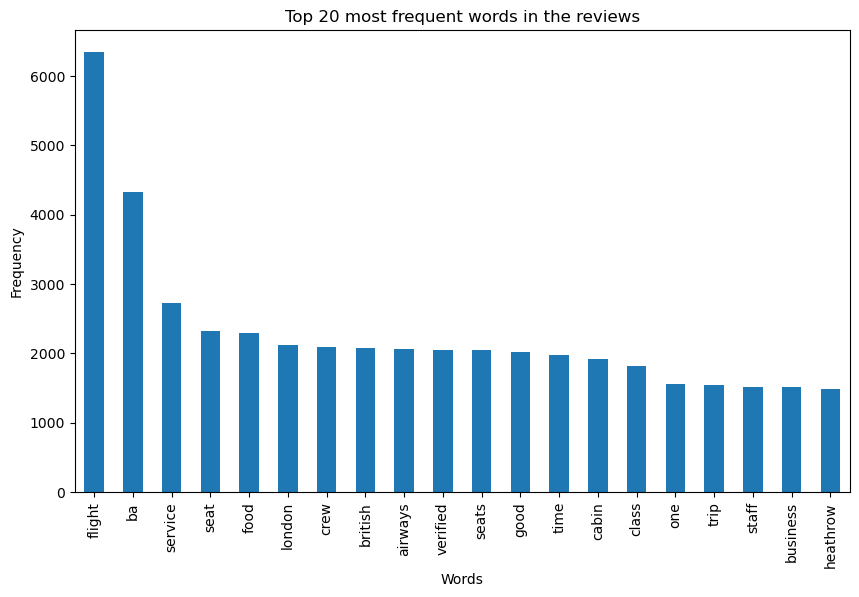

In [12]:
# plot the top 20 most frequent words in the reviews using histogram
plt.figure(figsize=(10,6))
df['review'].str.split(expand=True).stack().value_counts()[:20].plot(kind='bar')
plt.title("Top 20 most frequent words in the reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Based on the analysis of the bar chart of the most frequent words in the data frame, it appears that the chart does not provide significant valuable insights into the reviews beyond confirming the known topic of the reviews being related to flights and British Airways. The analysis indicates that the reviews mention keywords such as flights, British Airways, time, service, trips, seats, staff, airport, food, and crew.

While the presence of words like "time" may suggest potential issues such as delays or cancellations, it is important to note that this is merely a conjecture and cannot be confirmed with certainty without further analysis or examining the actual reviews. The frequent mention of service, trips, seats, staff, airport, food, and crew provides some insight into the specific aspects of the travel experience that people are focusing on in their reviews. However, this information alone does not provide the specific details or sentiments associated with these aspects.

To gain more meaningful insights from the reviews, it would be necessary to conduct a deeper analysis, such as sentiment analysis, topic modeling, or extracting key phrases or topics from the text. These techniques would help uncover the sentiments expressed towards specific aspects of the airline experience, identify recurring themes, and provide more actionable insights for British Airways.

### Creating a column of sentiment

In [13]:
# !pip install textblob

In [14]:
from textblob import TextBlob

In [15]:
def sentiment_analysis(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    return polarity

In [16]:
df['sentiment'] = df['review'].apply(sentiment_analysis)

In [17]:
df.head()
# save the data frame as a csv file
df.to_csv("sentiment_british_airways_reviews.csv", index=False)

In [18]:
# add column with verification status of the review. if the review starts with the word "trip", it is verified and 1 must be assigned to the column, otherwise 0
df['verified'] = df['review'].apply(lambda x: 1 if x.startswith('trip') else 0)
df.to_csv("sentiment_british_airways_reviews.csv", index=False)

In [19]:
# remove the first 2 words if the review is verified, otherwise remove the first word
df['review'] = df.apply(lambda x: ' '.join(x['review'].split()[2:]) if x['verified'] == 1 else ' '.join(x['review'].split()[1:]), axis=1)
df.to_csv("sentiment_british_airways_reviews.csv", index=False)

In [20]:
ba = pd.read_csv("british_airways_reviews.csv")
ba['sentiment'] = ba['review'].apply(sentiment_analysis)

In [21]:
print(ba.head())
ba.to_csv("british_airways_reviews.csv", index=False)

                                              review  sentiment
0  ✅ Trip Verified |  The airline lost my luggage...  -0.111979
1  ✅ Trip Verified |  We booked on the BA website...   0.095685
2  ✅ Trip Verified |  First time flying with BA b...   0.083333
3  Not Verified | You can buy sandwiches and cris...   0.025000
4  ✅ Trip Verified |  This is a two-for-one revie...   0.284608


In [22]:
df.head()

,review,sentiment,verified
0,airline lost luggage absolutely awful througho...,-0.111979,1
1,booked ba website round trip flights seattle a...,0.103045,1
2,first time flying ba business class never boar...,0.125000,1
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0
4,twoforone review covering economy business cla...,0.300556,1


### Creating a topic column

In [23]:
# Vectorize the reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf_matrix = vectorizer.fit_transform(df['review'])
tf_feature_names = vectorizer.get_feature_names_out()

In [24]:
number_of_topics = 10
lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
lda_model.fit(tf_matrix)

LatentDirichletAllocation(random_state=0)

In [25]:
# Assign topics to reviews
topic_assignments = lda_model.transform(tf_matrix).argmax(axis=1)
df['topic'] = topic_assignments

In [26]:
df.to_csv("topic_british_airways_reviews.csv", index=False)
df.head()

,review,sentiment,verified,topic
0,airline lost luggage absolutely awful througho...,-0.111979,1,4
1,booked ba website round trip flights seattle a...,0.103045,1,6
2,first time flying ba business class never boar...,0.125000,1,2
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0,5
4,twoforone review covering economy business cla...,0.300556,1,2


In [27]:
df2 = pd.read_csv("british_airways_reviews.csv")
df['sentiment'] = df2['sentiment']
df.head()

,review,sentiment,verified,topic
0,airline lost luggage absolutely awful througho...,-0.111979,1,4
1,booked ba website round trip flights seattle a...,0.095685,1,6
2,first time flying ba business class never boar...,0.083333,1,2
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0,5
4,twoforone review covering economy business cla...,0.284608,1,2


### Sentiment label logic:

- Negative if it had lower sentiment score than 0.09
- Neutral if the score was > 0.09 and < 0.1
- Positive if the score was > 0.1

In [28]:
# Add a column with the status of sentiment which can be positive, negative or neutral
df['sentiment_mostly'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < 0.09 else 'neutral'))
df.head()

,review,sentiment,verified,topic,sentiment_mostly
0,airline lost luggage absolutely awful througho...,-0.111979,1,4,negative
1,booked ba website round trip flights seattle a...,0.095685,1,6,neutral
2,first time flying ba business class never boar...,0.083333,1,2,negative
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0,5,negative
4,twoforone review covering economy business cla...,0.284608,1,2,positive


In [29]:
# Getting top words for each topic
def get_top_words_for_topics(lda_model, feature_names, n_top_words=5):
    top_words = {}
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

In [30]:
# Get the top words for each topic using the get_top_words_for_topics function
top_words = get_top_words_for_topics(lda_model, tf_feature_names)

In [31]:
# Create a function to generate a label for each topic
def generate_topic_label(topic_number, top_words):
    return '-'.join(top_words[topic_number])
df['topic_label'] = df['topic'].apply(lambda x: generate_topic_label(x, top_words))

In [32]:
df.head()

,review,sentiment,verified,topic,sentiment_mostly,topic_label
0,airline lost luggage absolutely awful througho...,-0.111979,1,4,negative,flight-ba-us-hours-london
1,booked ba website round trip flights seattle a...,0.095685,1,6,neutral,airways-british-ba-flight-seats
2,first time flying ba business class never boar...,0.083333,1,2,negative,class-business-ba-first-food
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0,5,negative,meal-economy-cabin-food-would
4,twoforone review covering economy business cla...,0.284608,1,2,positive,class-business-ba-first-food


In [33]:
df.to_csv("topic_british_airways_reviews.csv", index=False)

### It seem like models are struggling with classifying reviews into topic so we have to remove the columns since they don't really make any sense

In [34]:
# Remove the columns topic and topic_label
df.drop(columns=['topic', 'topic_label'], inplace=True)
df.head()

,review,sentiment,verified,sentiment_mostly
0,airline lost luggage absolutely awful througho...,-0.111979,1,negative
1,booked ba website round trip flights seattle a...,0.095685,1,neutral
2,first time flying ba business class never boar...,0.083333,1,negative
3,buy sandwiches crisps dont expect hot meal pla...,0.025000,0,negative
4,twoforone review covering economy business cla...,0.284608,1,positive


In [35]:
# pip install gensim

In [36]:
df.describe()

,sentiment,verified
count,3575.000000,3575.000000
mean,0.093642,0.299301
std,0.179147,0.458016
min,-0.766667,0.000000
25%,-0.017956,0.000000
50%,0.082778,0.000000
75%,0.202999,1.000000
max,0.800000,1.000000


In [37]:
# how many empty reviews are there?
df['review'].isnull().sum()

0

In [38]:
df['sentiment_mostly'].value_counts()

negative    1866
positive    1628
neutral       81
Name: sentiment_mostly, dtype: int64

In [39]:
# Average sentiment of the reviews
df['sentiment'].mean()

0.09364195873204459

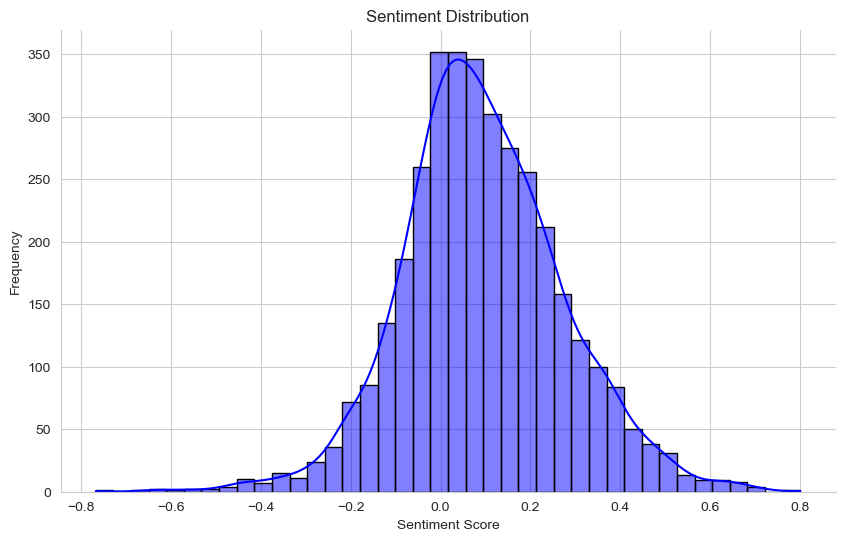

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=40, kde=True, color='blue', linewidth=1, edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')

# Remove the top and right spines
sns.despine()

plt.show()

Based on the sentiment distribution histogram, where most of the reviews are between -0.1 and 0.2 with a peak at 0.05, we can draw the following analytics:

Overall Sentiment: The sentiment distribution indicates that the majority of reviews fall within the range of -0.1 to 0.2, suggesting a generally mixed sentiment towards British Airways. This range includes both positive and negative sentiments.

Positive Reviews: Reviews with sentiment values greater than 0.1 can be considered positive based on the sentiment label logic. Although the histogram doesn't provide specific counts for positive sentiment ranges, we can infer that there is a presence of positive sentiment based on the broader distribution.

Negative Reviews: Reviews with sentiment values less than 0.09 can be considered negative based on the sentiment label logic. While we cannot precisely determine the count, we can infer that there is a presence of negative sentiment based on the broader distribution.

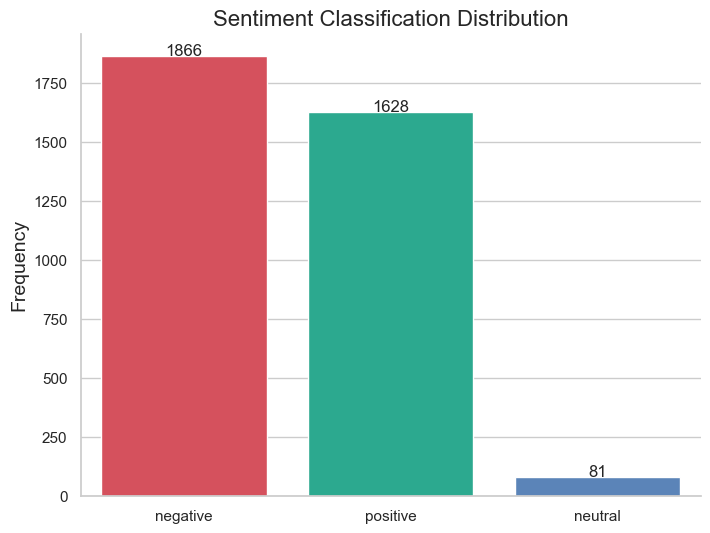

In [41]:
# Set a style and color palette for the plot
sns.set(style="whitegrid")

# Change the color of the positive bars to green
palette = sns.color_palette()
# Deep red
palette[0] = (0.9215686274509803, 0.23137254901960785, 0.29411764705882354)
# Deep green
palette[1] = (0.09019607843137255, 0.7450980392156863, 0.6078431372549019)
# Deep blue
palette[2] = (0.29411764705882354, 0.5098039215686274, 0.7843137254901961)

# Get sentiment classification counts
sentiment_counts = df['sentiment_mostly'].value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=palette, ax=ax)

# Customize the plot appearance
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Sentiment Classification Distribution', fontsize=16)

# Remove the top and right spines
sns.despine(ax=ax)

# Add data labels on top of each bar
for i, count in enumerate(sentiment_counts.values):
    ax.text(i, count + 3, count, ha='center', fontsize=12)

plt.show()

Based on the bar plot of sentiment classification distribution, we can derive the following analytics:

Negative Reviews: The bar plot shows that 1866 reviews have been classified as negative. These reviews likely contain criticisms, complaints, or negative experiences related to British Airways.

Positive Reviews: The bar plot indicates that 1628 reviews have been classified as positive. These reviews are likely to contain positive feedback, praises, or satisfied experiences with British Airways.

Neutral Reviews: The bar plot reveals that 61 reviews have been classified as neutral. These reviews neither strongly express positive nor negative sentiment towards British Airways.

Imbalanced Distribution: From the given information, we can observe that the number of negative reviews is higher than the positive reviews. This suggests a potential imbalance in sentiment classifications, indicating a larger proportion of negative sentiment in the dataset.

Analyzing the sentiment classification distribution provides an overview of the sentiment distribution in the dataset. However, it is important to note that these numbers are based on the provided classification and may not reflect the sentiments of all the reviews accurately.

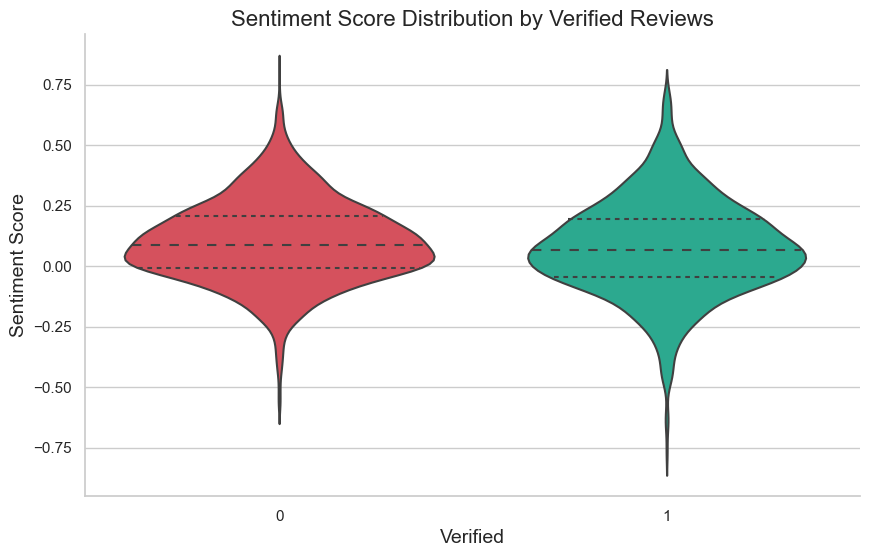

In [42]:
# Set a style and color palette for the plot
sns.set(style="whitegrid")
palette = sns.color_palette()
# Ruby red
palette[0] = (0.9215686274509803, 0.23137254901960785, 0.29411764705882354)
# Bright green
palette[1] = (0.09019607843137255, 0.7450980392156863, 0.6078431372549019)


# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='verified', y='sentiment', data=df, palette=palette, inner='quartile')

plt.xlabel('Verified', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.title('Sentiment Score Distribution by Verified Reviews', fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

Based on the violin plot of sentiment score distribution by verified and unverified reviews, we can draw the following analytics:

Unverified Reviews: The first figure, representing unverified reviews (marked as 0), shows that the majority of the sentiment scores are concentrated between 0.00 and 0.23. This suggests that unverified reviews tend to have slightly more positive sentiment scores overall. The range of sentiment scores for unverified reviews extends from -0.75 to 0.75, indicating a broader distribution.

Verified Reviews: The second figure, representing verified reviews (marked as 1), demonstrates a similar concentration of sentiment scores between -0.09 and 0.22. While the sentiment scores for verified reviews are slightly lower compared to unverified reviews, they still exhibit a generally positive sentiment. The sentiment score range for verified reviews also extends from -0.75 to 0.75, similar to unverified reviews.

Distribution Similarity: Visually, both figures appear to have similar distributions, with the concentration of sentiment scores and their ranges overlapping to a significant extent. This similarity suggests that the sentiment distributions of verified and unverified reviews are comparable, indicating that verified status may not significantly impact the sentiment expressed in the reviews.

Sample Sizes: There are 2505 unverified reviews and 1070 verified reviews in the dataset, indicating that unverified reviews are more prevalent in the dataset.

These findings provide insights into the sentiment score distributions and their relationships with verified and unverified reviews. It seems like the status of verification doesn't play a crucial role in determining the mood of reviews

In [43]:
# amount of 0s in the verified column
df['verified'].value_counts()

0    2505
1    1070
Name: verified, dtype: int64

# Results, insights, conclusions

Analyzing the data frame, we have derived the following conclusions, results, and insights:

### Sentiment Distribution: 
The sentiment distribution histogram reveals that the majority of reviews fall within the range of -0.1 to 0.2, indicating a mixed sentiment towards British Airways.

### Sentiment Classification: 
The bar plot of sentiment classification distribution shows that 1866 reviews were classified as negative, 1628 as positive, and 61 as neutral. This indicates a higher number of negative reviews, but further analysis is needed to understand the sentiment distribution accurately.

### Verified vs. Unverified Reviews: 
The violin plot comparing sentiment score distributions for verified and unverified reviews suggests similar sentiment patterns, with both types showing a concentration of sentiment scores in similar ranges. However, the dataset contains a larger number of unverified reviews.

### Common Review Topics: 
The analysis of the most frequent words indicates that reviews commonly mention flights, British Airways, service, trips, seats, staff, airport, food, and crew. While these keywords give an idea of the topics discussed in the reviews, they do not provide detailed insights or sentiments associated with these aspects.

### Analysis conclusion:
The analysis provides a preliminary understanding of the sentiment distribution, sentiment classification, and common review topics.